In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from astropy.table import Table

In [2]:
mpl.rc('font', size=18)

In [4]:
nsa = Table.read('../../../data/NSA_v1_0_1_VAGC_vflag-V2-VF.fits')
nsa

IAUNAME,SUBDIR,RA,DEC,ISDSS,INED,ISIXDF,IALFALFA,IZCAT,ITWODF,MAG,Z,ZSRC,SIZE,RUN,CAMCOL,FIELD,RERUN,XPOS,YPOS,NSAID,ZDIST,SERSIC_NMGY [7],SERSIC_NMGY_IVAR [7],SERSIC_OK,SERSIC_RNMGY [7],SERSIC_ABSMAG [7],SERSIC_AMIVAR [7],EXTINCTION [7],SERSIC_KCORRECT [7],SERSIC_KCOEFF [5],SERSIC_MTOL [7],SERSIC_B300,SERSIC_B1000,SERSIC_METS,SERSIC_MASS,XCEN,YCEN,NPROF [7],"PROFMEAN [15,7]","PROFMEAN_IVAR [15,7]","QSTOKES [15,7]","USTOKES [15,7]","BASTOKES [15,7]","PHISTOKES [15,7]",PETRO_FLUX [7],PETRO_FLUX_IVAR [7],FIBER_FLUX [7],FIBER_FLUX_IVAR [7],PETRO_BA50,PETRO_PHI50,PETRO_BA90,PETRO_PHI90,SERSIC_FLUX [7],SERSIC_FLUX_IVAR [7],SERSIC_N,SERSIC_BA,SERSIC_PHI,ASYMMETRY [7],CLUMPY [7],DFLAGS [7],AID,PID,DVERSION,PROFTHETA [15],PETRO_THETA,PETRO_TH50,PETRO_TH90,SERSIC_TH50,PLATE,FIBERID,MJD,RACAT,DECCAT,ZSDSSLINE,SURVEY,PROGRAMNAME,PLATEQUALITY,TILE,PLUG_RA,PLUG_DEC,ELPETRO_BA,ELPETRO_PHI,ELPETRO_FLUX_R,ELPETRO_FLUX_IVAR_R,ELPETRO_THETA_R,ELPETRO_TH50_R,ELPETRO_TH90_R,ELPETRO_THETA,ELPETRO_FLUX [7],ELPETRO_FLUX_IVAR [7],ELPETRO_TH50 [7],ELPETRO_TH90 [7],ELPETRO_APCORR_R,ELPETRO_APCORR [7],ELPETRO_APCORR_SELF [7],ELPETRO_NMGY [7],ELPETRO_NMGY_IVAR [7],ELPETRO_OK,ELPETRO_RNMGY [7],ELPETRO_ABSMAG [7],ELPETRO_AMIVAR [7],ELPETRO_KCORRECT [7],ELPETRO_KCOEFF [5],ELPETRO_MASS,ELPETRO_MTOL [7],ELPETRO_B300,ELPETRO_B1000,ELPETRO_METS,IN_DR7_LSS,u_r,g_r,NUV_r,index,imc,aimc,cd,conx1,u_r_KIAS,prmag,BPTclass,SFR,sSFR,HImass,flag3727,t3,Z12logOH,Zerr,N12logNH,NHerr,logNO,NOerr,Ne12logNeH,NeHerr,logNeO,NeOerr,Z_N2O2,vorvol,V2_depth,vflag_V2,vflag_VF
bytes19,bytes27,float64,float64,int32,int32,int32,int32,int32,int32,float32,float32,bytes7,float32,int16,uint8,int16,bytes3,float32,float32,int32,float32,float32,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,uint8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,bytes8,float32,float32,float32,float32,float32,int32,int16,int32,float64,float64,float32,bytes6,bytes27,bytes8,int32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64
J094651.40-010228.5,09h/m00/J094651.40-010228.5,146.714215072841,-1.0412800233313741,0,72212,37354,-1,-1,-1,15.178774,0.021222278,sdss,0.07,756,1,206,301,136.2967,1095.152,0,0.020687785,29.696056 .. 3267.6895,0.29814342 .. 0.00012172792,1,31.368013 .. 3501.2527,-15.17281 .. -20.302134,223.03555 .. 1102.6129,0.4536473 .. 0.080934174,-0.005893635 .. 0.019576037,0.00017777947 .. 5.1533486e-11,0.00020792194 .. 0.98780394,2.7473723e-05,0.31195974,0.035135116,8898397000.0,215.39407348632812,213.4535369873047,10 .. 12,0.3149959 .. 0.0,233.37904 .. 0.0,0.062215745 .. -0.07950058,0.0006146176 .. -0.1274703,0.8828513 .. 0.7387829,0.2829979 .. -60.97547,18.203371 .. 2264.6604,1.9946122 .. 0.015697604,1.0260131 .. 561.97687,47.3397 .. 0.33574256,0.88909996,14.777527,0.80408496,17.367554,19.554192 .. 3146.785,1.0691423 .. 0.017162137,4.7761517,0.6651653,15.97821,-0.0109440535 .. 0.004525926,0.042470127 .. 0.042621203,0 .. 0,0,36,v2_1_13,0.22341923 .. 258.39,7.2478933,3.4641922,10.453795,5.882104,266,1,51630,146.71420341874853,-1.0412749124036818,0.0,sdss,legacy,good,122,146.71421,-1.0413043,0.80408496,17.367554,1144.0713,0.4582725,7.3913364,3.7061903,10.666219,7.3913364,18.787916 .. 2225.009,1.8480047 .. 0.017611798,5.8557696 .. 3.4004514,11.650886 .. 10.1460905,0.9986329,1.0687045 .. 1.001099,1.0695114 .. 1.0010818,28.532349 .. 2310.4973,0.42499655 .. 0.00024172392,1,

In [5]:
# When the catalog is the NSA, only keep those objects which were originally in the DR7 LSS
select = nsa['IN_DR7_LSS'] == 1

catalog_SDSS = nsa[select]

ra_boolean = np.logical_and(catalog_SDSS['RA'] > 110, catalog_SDSS['RA'] < 270)
catalog_north = catalog_SDSS[ra_boolean]

strip_boolean = np.logical_and.reduce([catalog_north['RA'] > 250, 
                                       catalog_north['RA'] < 269, 
                                       catalog_north['DEC'] > 51, 
                                       catalog_north['DEC'] < 67])
catalog_main = catalog_north[~strip_boolean]

In [6]:
# ra,dec,z
ra = np.array(catalog_main['RA'])
dec = np.array(catalog_main['DEC'])
z = np.array(catalog_main['Z'])

#stellar mass
#Mstar = np.array(data['Mstar'])
Mstar_NSA = np.log10(catalog_main['ELPETRO_MASS'])

# color
#u_r = np.array(data['u_r'])
# u_r = u_r[np.logical_not(np.isnan(u_r))] 
u_r_NSA = np.array(catalog_main['u_r'])

#g_r = np.array(data['g_r'])
g_r_NSA = np.array(catalog_main['g_r'])

# absolute magnitude
#rabsmag = np.array(data['rabsmag'])
rabsmag_NSA = np.array(catalog_main['ELPETRO_ABSMAG'][:,4])

# star formation rate and specific SPR
#SFR = np.array(data['SFR'])
SFR  = np.array(catalog_main['SFR'])

#sSFR = np.array(data['sSFR'])
sSFR = np.array(catalog_main['sSFR'])

/var/folders/5x/2533z9ns34n_8ghxd5f6hl0c0000gn/T/ipykernel_17843/3799946246.py:8: RuntimeWarning: divide by zero encountered in log10
  Mstar_NSA = np.log10(catalog_main['ELPETRO_MASS'])


In [7]:
fluxF, fluxN, fluxu, fluxg, fluxr, fluxi, fluxz = [catalog_main['ELPETRO_FLUX'][:,i] for i in range(7)]
ivarF, ivarN, ivaru, ivarg, ivarr, ivari, ivarz = [catalog_main['ELPETRO_FLUX_IVAR'][:,i] for i in range(7)]

ln10 = np.log(10)

u = 22.5 - 2.5*np.log10(fluxu)
varu = (2.5/(fluxu * ln10))**2 / ivaru

r = 22.5 - 2.5*np.log10(fluxr)
varr = (2.5/(fluxr * ln10))**2 / ivarr

# # uncertainty propagation from flux to magnitude:
# # dmag = |2.5/f*ln(10)| * dflux, where dflux = 1/sqrt(ivar_flux)
# dF, dN, du, dg, dr, di, dz = [np.abs(2.5/(np.log(10)*catalog_main['ELPETRO_FLUX'][:,i]))/np.sqrt(catalog_main['ELPETRO_FLUX_IVAR'][:,i]) for i in range(7)]

/var/folders/5x/2533z9ns34n_8ghxd5f6hl0c0000gn/T/ipykernel_17843/3001072959.py:6: RuntimeWarning: invalid value encountered in log10
  u = 22.5 - 2.5*np.log10(fluxu)
/var/folders/5x/2533z9ns34n_8ghxd5f6hl0c0000gn/T/ipykernel_17843/3001072959.py:9: RuntimeWarning: invalid value encountered in log10
  r = 22.5 - 2.5*np.log10(fluxr)


In [8]:
#u_r = u - r
u_r = -2.5*np.log10(fluxu/fluxr)
var_u_r = varu + varr
ivar_u_r = 1 / var_u_r

/var/folders/5x/2533z9ns34n_8ghxd5f6hl0c0000gn/T/ipykernel_17843/219528312.py:2: RuntimeWarning: invalid value encountered in log10
  u_r = -2.5*np.log10(fluxu/fluxr)


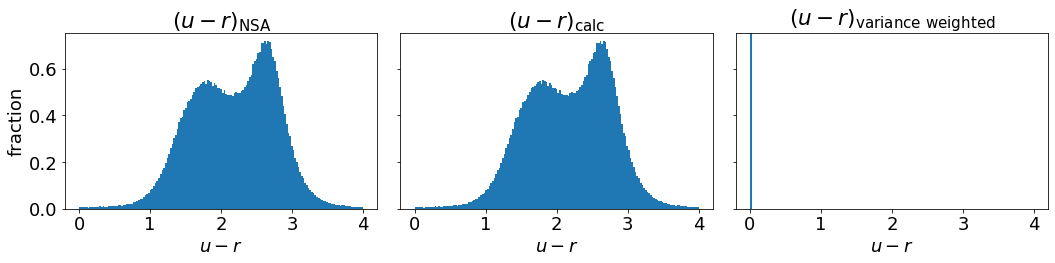

In [13]:
fig, axes = plt.subplots(1,3, 
                         figsize=(15,4), 
                         tight_layout=True, 
                         sharex=True, 
                         sharey=True)

ax = axes[0]
ax.hist(u_r_NSA, bins=np.linspace(0,4, 170), density=True)
ax.set(xlabel='$u-r$', ylabel='fraction', title='$(u-r)_\mathrm{NSA}$')

ax = axes[1]
ax.hist(u_r, bins=np.linspace(0,4, 170), density=True)
ax.set(xlabel='$u-r$', title='$(u-r)_\mathrm{calc}$')

ax = axes[2]
ax.hist(u_r, bins=np.linspace(0,4, 170), density=True, weights=ivar_u_r)
ax.set(xlabel='$u-r$', title='$(u-r)_\mathrm{variance~weighted}$', ylim=(0,0.75));

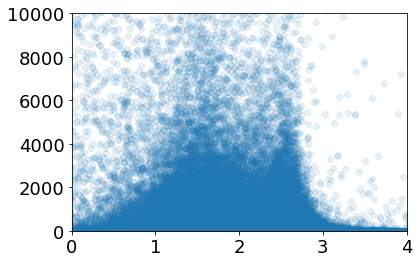

In [15]:
plt.scatter(u_r, ivar_u_r, alpha=0.1)
plt.xlim(0, 4)
plt.ylim(0,10000);